# Netflix Movies and TV Shows Data Analysis


**Dataset:** `netflix_titles.csv` (Kaggle)

**Goal:** Clean the dataset, perform exploratory data analysis (EDA), create meaningful visualizations, and note insights about content type, countries, genres, release trends, directors, and ratings.

**Flow:**
1. Load libraries and data  
2. Data overview & cleaning  
3. EDA (counts, trends, top countries/genres/directors)  
4. Visualizations  
5. Key insights & conclusions



In [5]:
# Libraries import and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show plots inline
%matplotlib inline

# display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


# Load dataset (make sure netflix_titles.csv is in the same folder as the notebook)
df = pd.read_csv("netflix_titles.csv")


# show first rows
df.head()


**Basic Dataset Info**

In [13]:
# Check the shape of the dataset
df.shape

# Show column names
df.columns

# Dataset basic info (data types, null values)
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


**Missing values**

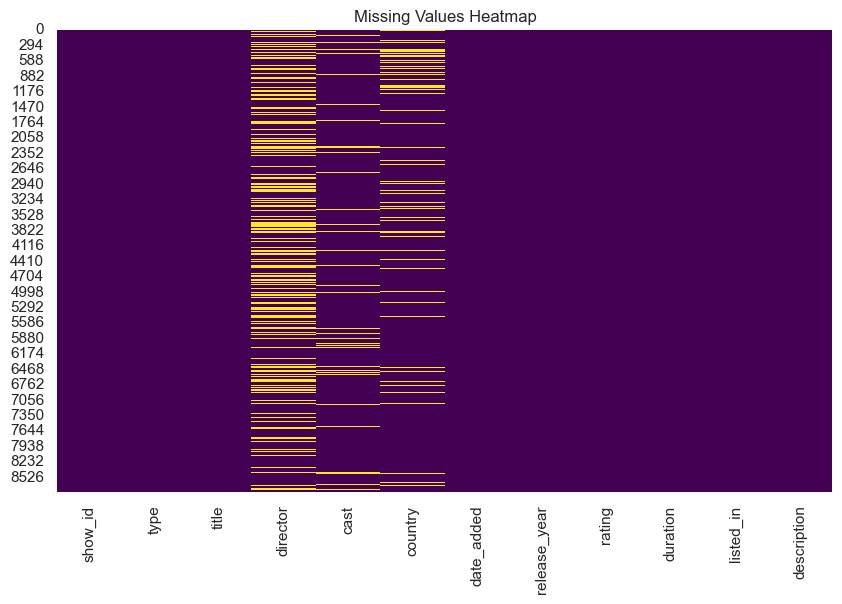

In [14]:
# Check missing values count
df.isnull().sum()

# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


**Movies vs TV Shows Count**

C:\Users\nidhi\AppData\Local\Temp\ipykernel_4444\2906677321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="Set2")


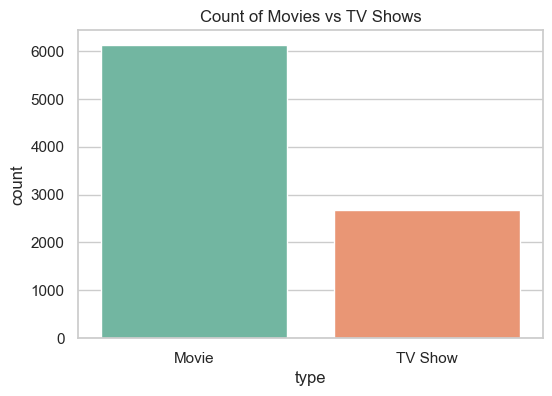

In [15]:
# Count of Movies and TV Shows
df['type'].value_counts()

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette="Set2")
plt.title("Count of Movies vs TV Shows")
plt.show()


**Top 10 Countries Producing Content**

C:\Users\nidhi\AppData\Local\Temp\ipykernel_4444\3441778872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


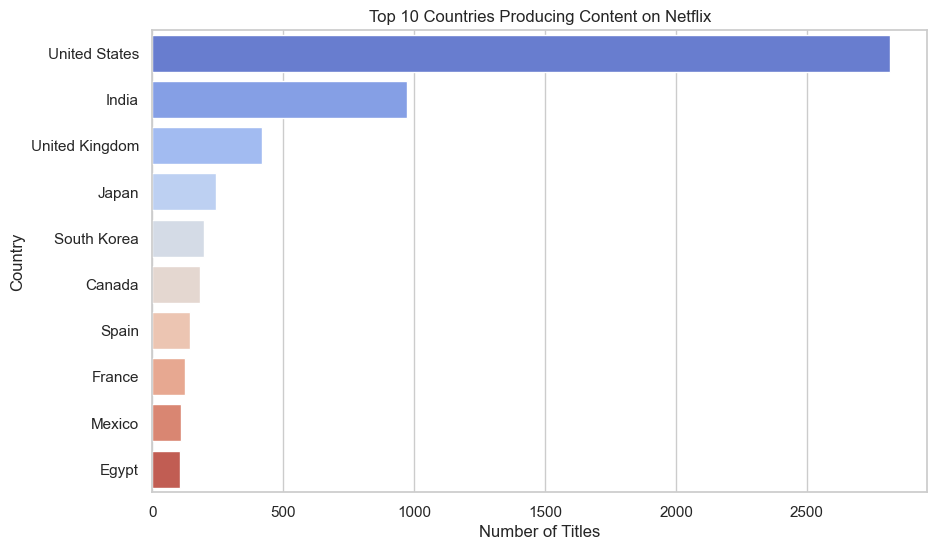

In [16]:
# Drop NaN values before counting
top_countries = df['country'].dropna().value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**Most Common Genres**

C:\Users\nidhi\AppData\Local\Temp\ipykernel_4444\3934771063.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genres_df, palette="viridis")


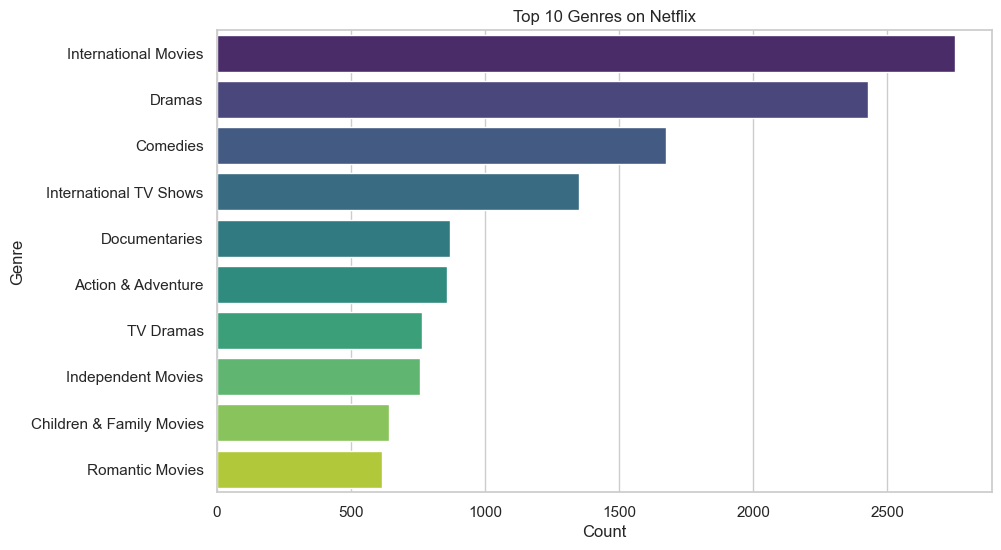

In [18]:
# Extract and count genres from 'listed_in' column
from collections import Counter

genres = []
for genre_list in df['listed_in'].dropna():
    for genre in genre_list.split(','):
        genres.append(genre.strip())

top_genres = Counter(genres).most_common(10)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genres_df, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.show()


**Advanced Analysis — Release Trends, Directors, Ratings, WordCloud & Correlations**


In [19]:
# Prepare helper columns: parse date_added, release_year numeric, duration in minutes, primary_country, primary_director
import os

# ensure images folder exists
os.makedirs("images", exist_ok=True)

# parse date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

# ensure release_year numeric (if already numeric fine)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

# parse duration: create duration_min (if minutes) and duration_seasons (if seasons)
def parse_duration(d):
    if pd.isna(d):
        return (pd.NA, pd.NA)
    d = str(d).strip()
    if 'min' in d:
        try:
            minutes = int(d.replace('min','').strip())
            return (minutes, pd.NA)
        except:
            return (pd.NA, pd.NA)
    if 'Season' in d or 'Seasons' in d:
        try:
            seasons = int(d.split()[0])
            return (pd.NA, seasons)
        except:
            return (pd.NA, pd.NA)
    return (pd.NA, pd.NA)

parsed = df['duration'].apply(parse_duration)
df['duration_min'] = parsed.apply(lambda x: x[0])
df['duration_seasons'] = parsed.apply(lambda x: x[1])

# primary country & primary director
df['primary_country'] = df['country'].fillna("Unknown").apply(lambda s: s.split(',')[0].strip() if s and s!="Unknown" else "Unknown")
df['primary_director'] = df['director'].fillna("Unknown").apply(lambda s: s.split(',')[0].strip() if s and s!="Unknown" else "Unknown")

# quick check
df[['title','type','release_year','date_added','added_year','duration','duration_min','duration_seasons','primary_country','primary_director']].head()


,title,type,release_year,date_added,added_year,duration,duration_min,duration_seasons,primary_country,primary_director
0,Dick Johnson Is Dead,Movie,2020,2021-09-25,2021.0,90 min,90,<NA>,United States,Kirsten Johnson
1,Blood & Water,TV Show,2021,2021-09-24,2021.0,2 Seasons,<NA>,2,South Africa,Unknown
2,Ganglands,TV Show,2021,2021-09-24,2021.0,1 Season,<NA>,1,Unknown,Julien Leclercq
3,Jailbirds New Orleans,TV Show,2021,2021-09-24,2021.0,1 Season,<NA>,1,Unknown,Unknown
4,Kota Factory,TV Show,2021,2021-09-24,2021.0,2 Seasons,<NA>,2,India,Unknown


## Release year trend (how many titles were released each year)


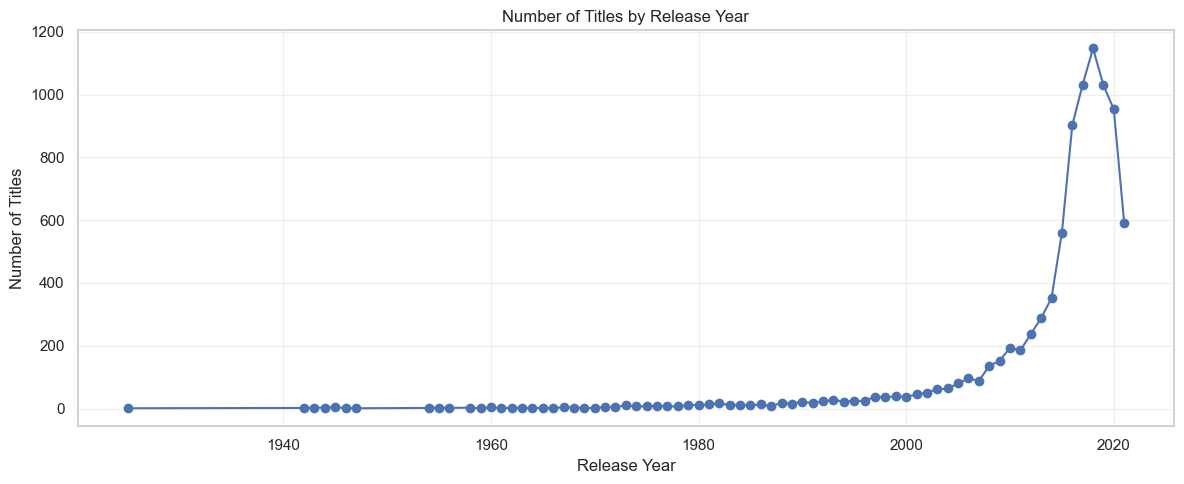

In [20]:
# Plot number of titles by release_year (drop missing years)
release_counts = df['release_year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12,5))
release_counts.plot(kind='line', marker='o')
plt.title("Number of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("images/release_year_trend.png", dpi=150)
plt.show()



## Titles added to Netflix per year (based on date_added)


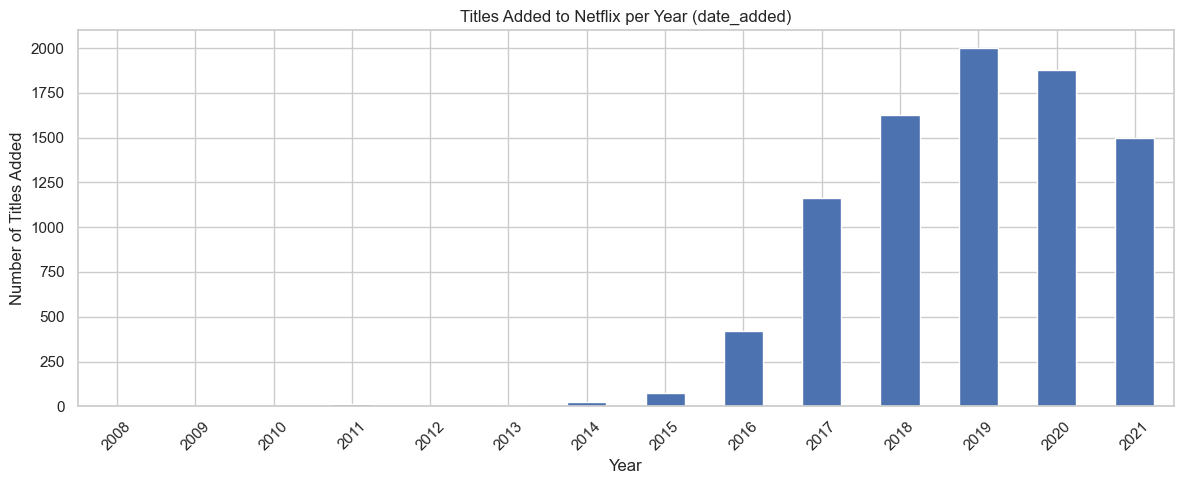

In [21]:
# Titles added per year (using date_added)
added_by_year = df['added_year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12,5))
added_by_year.plot(kind='bar')
plt.title("Titles Added to Netflix per Year (date_added)")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/added_by_year.png", dpi=150)
plt.show()


## Top Directors (who have most titles) — primary director counted


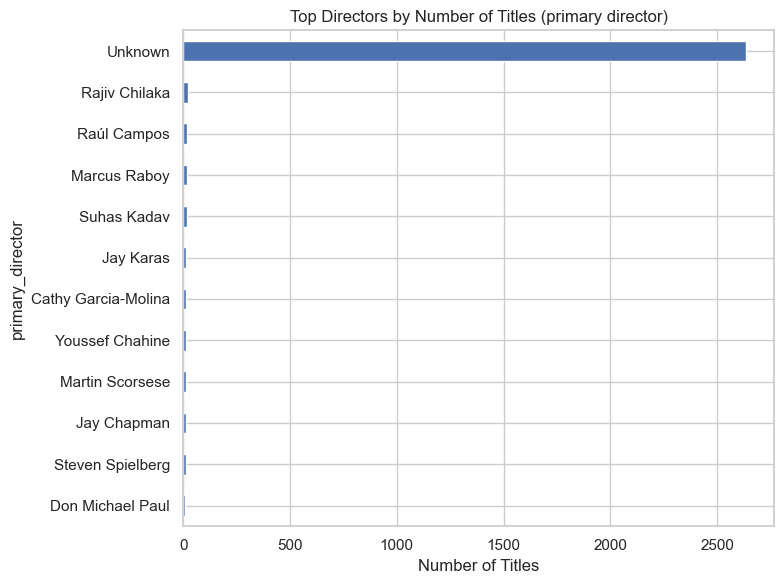

primary_director
Unknown                2634
Rajiv Chilaka            22
Raúl Campos              18
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Youssef Chahine          12
Martin Scorsese          12
Steven Spielberg         11
Don Michael Paul         10
Name: count, dtype: int64

In [22]:
# Top 12 directors by number of titles
top_directors = df['primary_director'].value_counts().head(12)

plt.figure(figsize=(8,6))
top_directors.sort_values().plot(kind='barh')
plt.title("Top Directors by Number of Titles (primary director)")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.savefig("images/top_directors.png", dpi=150)
plt.show()

top_directors


## Rating distribution (top ratings)


C:\Users\nidhi\AppData\Local\Temp\ipykernel_4444\1206838391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="magma")


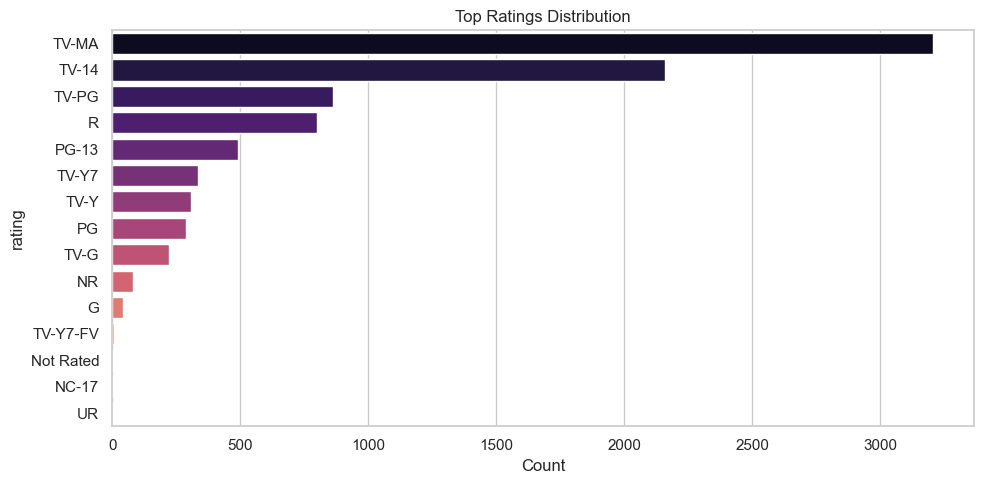

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
Name: count, dtype: int64

In [23]:
# Ratings distribution (show top categories)
rating_counts = df['rating'].fillna("Not Rated").value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="magma")
plt.title("Top Ratings Distribution")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("images/rating_distribution.png", dpi=150)
plt.show()

rating_counts


## Word Cloud from descriptions (most common words in 'description' column)


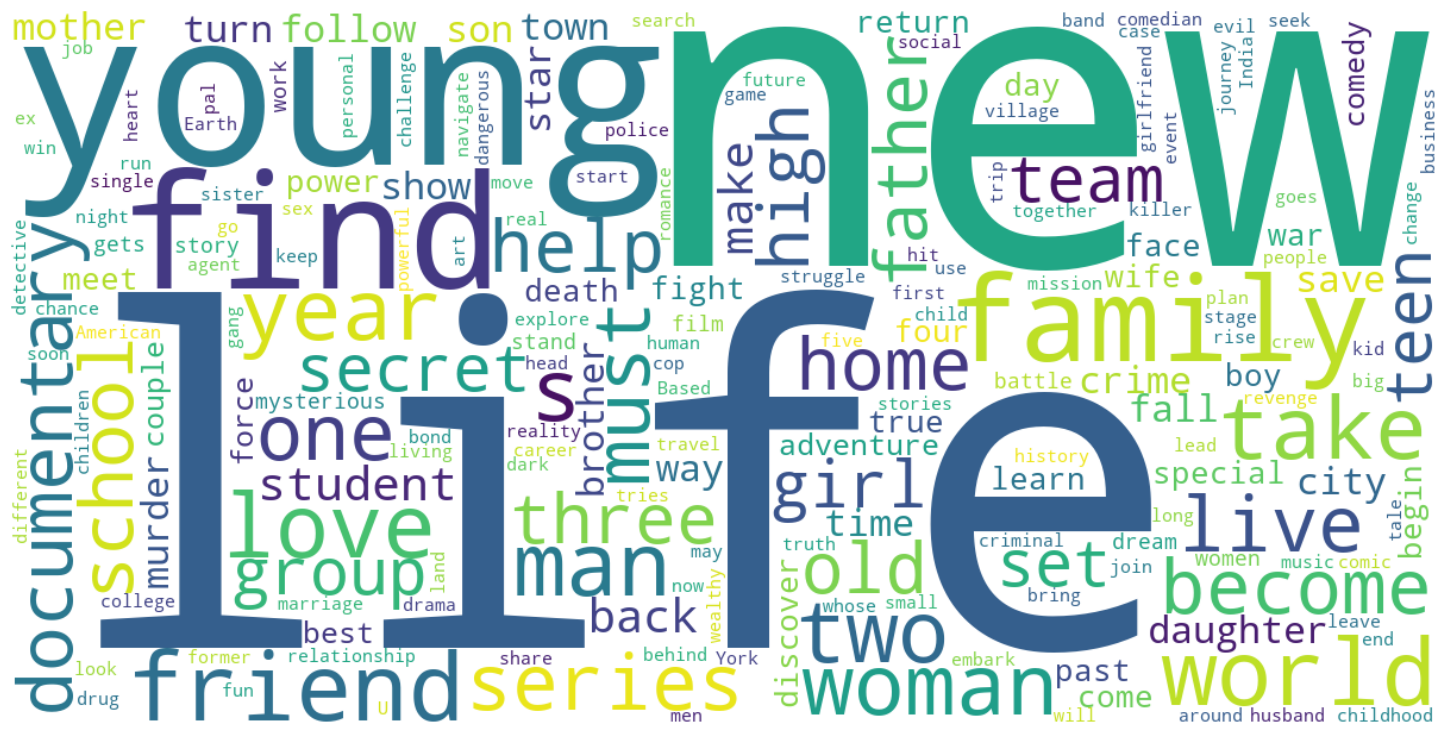

In [25]:
# If wordcloud not installed, uncomment and run the next line once:
# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

# prepare text from description column
text = " ".join(df['description'].dropna().astype(str).tolist())

# small stopwords set
stopwords = set(STOPWORDS)
# generate wordcloud
wc = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, collocations=False).generate(text)

# plot and save
plt.figure(figsize=(15,7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
wc.to_file("images/description_wordcloud.png")
plt.show()


## Correlation and numeric checks (duration minutes vs release year etc.)


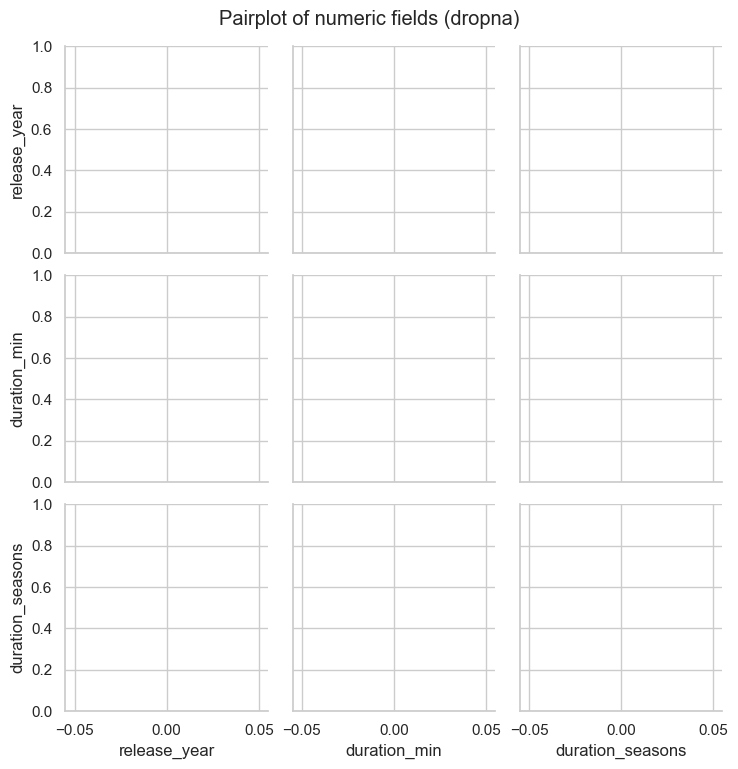

,release_year,duration_min,duration_seasons
release_year,1.000000,-0.206285,-0.090194
duration_min,-0.206285,1.000000,NaN
duration_seasons,-0.090194,NaN,1.000000


In [26]:
# Check correlations between numeric columns (release_year, duration_min, duration_seasons)
num_df = df[['release_year','duration_min','duration_seasons']].copy()

# convert Int64/NA to numeric float for correlation
num_df = num_df.apply(pd.to_numeric, errors='coerce')

# show pairplot (scatter + hist)
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(num_df.dropna(), diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairplot of numeric fields (dropna)", y=1.02)
plt.show()

# print correlation matrix
corr = num_df.corr()
corr


## Save cleaned dataset and save main plots


In [27]:
# Save cleaned dataframe (without heavy object columns or with them as needed)
df.to_csv("netflix_cleaned.csv", index=False)
print("Saved cleaned CSV: netflix_cleaned.csv")

# List saved images
saved_images = os.listdir("images")
print("Saved images in images/ :", saved_images)


Saved cleaned CSV: netflix_cleaned.csv
Saved images in images/ : ['added_by_year.png', 'description_wordcloud.png', 'rating_distribution.png', 'release_year_trend.png', 'top_directors.png']


## How to push your project to GitHub (run these from your project folder in Git Bash)

1. Make sure your project folder contains:
   - Netflix_Movies_and_TV_Shows_Analysis.ipynb
   - netflix_titles.csv  (or netflix_cleaned.csv)
   - images/  (saved plot images)
   - requirements.txt (optional)

2. From Git Bash (inside the project folder) run:
   git init
   git add .
   git commit -m "Add Netflix analysis notebook, dataset and images"
   git branch -M main
   git remote add origin https://github.com/YOUR-USERNAME/YOUR-REPO-NAME.git
   git push -u origin main




In [29]:
import os
print(os.getcwd())


C:\Users\nidhi\OneDrive\Desktop\Net flix movie project


## Next steps / Improvements you can add

- Use Plotly for interactive charts and embed them in the notebook.
- Create a Streamlit or Dash dashboard to filter by country/genre/year.
- Build a simple recommendation (content-based) using genres and descriptions (TF-IDF).
- Add more text analysis on descriptions: n-grams, sentiment, topics (LDA).
